Integral de superficie de un campo vectorial (integral de flujo)

Se considera la superficie $S$ correspondiente a la porción de paraboloide $z=a^2-x^2-y^2$ para $x\ge 0,\, y\ge 0,\, z\ge 0$, y $a$ es un número real negativo. Consideramos el campo vectorial $V$,

$$
V(x,y,z)=(ax, -\frac{2}{a}y, z) 
$$

Se pide:

(a) Representa la superficie $S$ para el valor de $a=1$

(b) Resprenseta una muestra del campo y de vectores normales a la superficie para el valor de $a=1$

(c) Calcula a mano el flujo $V$ hacia el exterior de $S$, para cualquier valor de $a$

(d) Analiza el comportamiento del flujo en función del parámetro $a$. ¿Es creciente el flujo con el valor de $a$?. ¿Existe un valor mínimo para el flujo?. Representa la función flujo en función de $a$ en función de $a$ en el intervalo $a\in[-2,-0.01]$.

Sol: Flujo=$\frac{\pi a^3}{8}(a^2+a-2)$ 



https://personales.unican.es/alvareze/CalculoWeb/CalculoII/practicas/PR6_SuperficiesCampos_17_18.pdf

Para dibujar la superficie y una muestra de vectores de velocidad y vectores normales sobre ella, utilizamos las ecuaciones paramétricas

$$
x=r\cos(t),\, y=r\sin(t), \, z=1-r^2, \, 0\le r \le 1,\, 0\le t\le \frac{\pi}{2}
$$

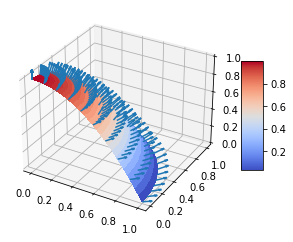

In [12]:
#Apartados a) y b)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
#Dibujo la superficie
r=np.linspace(0,1,30)
t=np.linspace(0,np.pi/2,40)
[R,T]=np.meshgrid(r,t)
X=R*np.cos(T)
Y=R*np.sin(T)
Z=1-R**2
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

#Dibujo una muestra del cmapo sobre la superficie

r1=np.linspace(0,1,10)
t1=np.linspace(0,np.pi/2,20)
[R,T]=np.meshgrid(r1,t1)
X=R*np.cos(T)
Y=R*np.sin(T)
Z=1-R**2
ax.quiver(X, Y, Z, 2*X, 2*Y, np.ones_like(X), length=0.1, normalize=True)


c) 

Como $z=g(x,y)= a^2 - x^2 - y^2$: El vector normal exterior a la superficie es: 


Flujo= $\int \int_S V\cdot n \, dS= \int \int_D V\cdot(-gx,-gy,1) dx\, dy ($



#Apartado d)

Usando la solución obtenida en el apartado c) 

$$
F(a) = \frac{\pi a^3}{8}(a^2 + a -2)
$$


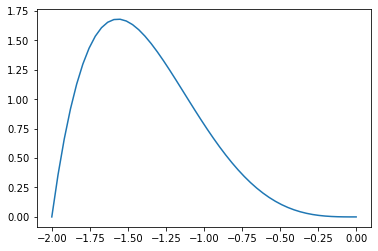

In [23]:
#Representamos el flujo en función del parámetro "a"
fig=plt.figure(2)
av=np.linspace(-2,-0.001,50)
F=np.pi*av**3*(av**2+av-2)/8
plt.plot(av,F)


f=  a**2 + 2*a*x**2 - x**2 - y**2 - 4*y**2/a
Flujo=  pi*a**3*(a**2 + a - 2)/8
Ptos criticos=  [0, -2/5 + sqrt(34)/5, -sqrt(34)/5 - 2/5]
0
pto de inflexion
-2/5 + sqrt(34)/5
minimo en  0.766190378969060
-sqrt(34)/5 - 2/5
maximo en  -1.56619037896906 -0.114239005290052


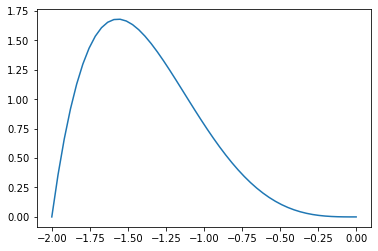

In [53]:
import sympy as sp
#Calculo del flujo con sympy
x,y,a=sp.symbols('x,y,a')
g=a**2-x**2-y**2
dg=[sp.diff(g,x), sp.diff(g,y)]
V=[a*x,-2/a*y,g]
f=V[0]*(-dg[0])+V[1]*(-dg[1])+V[2]
f=sp.simplify(f)
print("f= ", f)
r,th=sp.symbols('r,th')
f=f.subs([ (x,r*sp.cos(th)),(y,r*sp.sin(th))  ])
f=sp.simplify(f)
flujo=sp.integrate(f*r,(r,0,-a),(th,0,sp.pi/2))  #OJO!! no me está dando lo mismo que a mano

flujo=sp.simplify(flujo)
print("Flujo= ", flujo)
#Usamos cálculo simbólico para obtener los puntos críticos y determinar los extremos relativos
der_flujo=sp.diff(flujo,a)
pc=sp.solve(der_flujo,a)
print("Ptos criticos= ", pc)
der2=sp.diff(der_flujo,a)
for p in pc:
    print(p)
    p=p.evalf()
    res=der2.subs(a,p)
    if(res>0): 
        val=flujo.subs(a,p).evalf()
        print("minimo en ", p,)
    if(res<0):
        print("maximo en ", p,val)

    if (res==0): 
        print("pto de inflexion")


func=sp.lambdify(a,flujo)
fig=plt.figure(2)
av=np.linspace(-2,-0.001,50)
F=func(av)
plt.plot(av,F)